In [288]:
# import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [216]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print shape of X

In [217]:
X_scaled = preprocessing.scale(X)
X.shape

(150, 4)

* print y

In [218]:
y.shape

(150,)

* create logistic regression model

In [219]:
log_reg = LogisticRegression()

* create regularization space for 'penalty' param (a.k.a. what values do we want to insert into GridSearch?)

In [220]:
grid={"C":np.logspace(-3,3,10), "penalty":['l2']}
n_folds = 5

* create regularization space for 'c' param (a.k.a. what values do we want to insert into GridSearch?)

In [221]:
# done above

* create hyperparameter options dictionary

In [222]:
# done above

* create grid search using 5-fold cross validation

In [223]:
log_reg_cv = GridSearchCV(log_reg,grid,cv=n_folds)

* fit grid search

In [224]:
log_reg_cv.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l2']})

* take best model from grid search

In [225]:
print(log_reg_cv.best_params_)
print(log_reg_cv.best_score_)

{'C': 10.0, 'penalty': 'l2'}
0.9733333333333334


* print best hyperparameters

In [226]:
# done above

* predict target vector
    - class
    - probabilities

In [227]:
log_reg = LogisticRegression(penalty='l2', C = 10, multi_class = 'multinomial')

In [228]:
y.shape

(150,)

In [229]:
log_res = log_reg.fit(X_scaled,y)
y_pred=log_res.predict(X_scaled)

In [230]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [231]:
cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

- plot the ROC curve and pring the AUC

# ROC curve

In [ ]:
# clf = OneVsRestClassifier(LogisticRegression())

In [293]:
y =  label_binarize(y, classes=[0, 1, 2])

In [294]:
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_scaled, y).decision_function(X_scaled)

In [295]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [296]:
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [297]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [298]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

In [299]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

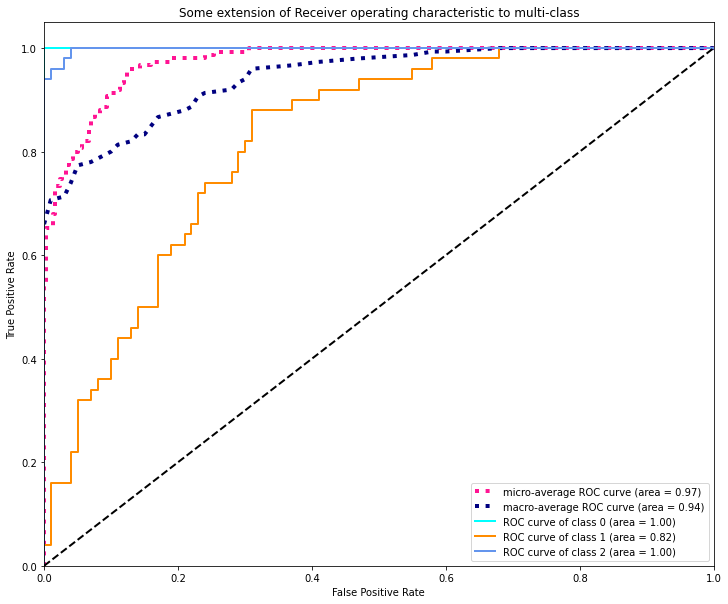

In [300]:
lw = 2
plt.figure(figsize=(12,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

* print Logreg coeficients

In [198]:
log_res.coef_

array([[-1.64502234,  1.86143635, -3.61038577, -3.39685069],
       [ 1.26011068, -0.3397398 , -1.49239387, -1.43139623],
       [ 0.38491166, -1.52169655,  5.10277964,  4.82824692]])

* print Logreg intercepts

In [185]:
log_res.intercept_

array([ 0.10511672,  4.05018059, -4.15529731])

In [208]:
X_scaled[50].reshape(1,-1).dot(log_res.coef_.T) + log_res.intercept_

array([[-4.41935611,  4.52752873, -0.10817263]])